In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
# read dataset
data = pd.read_csv("Wholesale customers data.csv")

In [3]:
data.shape

(440, 8)

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.drop(labels =(['Channel','Region']) ,axis=1,inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [7]:
#Standardisation and decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

PCA_train = PCA(2).fit_transform(scaled_data)

print(scaled_data)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [8]:
ps = pd.DataFrame(PCA_train)
ps.head()

,0,1
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434


In [9]:
# we need to choose number of clusters using dendrogram

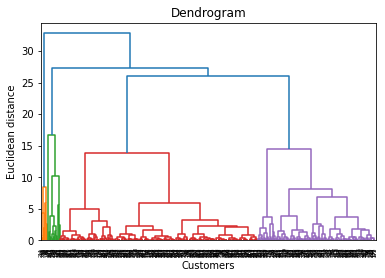

In [10]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(ps, method = 'ward'))
mtp.title('Dendrogram')
mtp.xlabel('Customers')
mtp.ylabel('Euclidean distance')
mtp.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(ps) 

In [14]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 3,
       0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

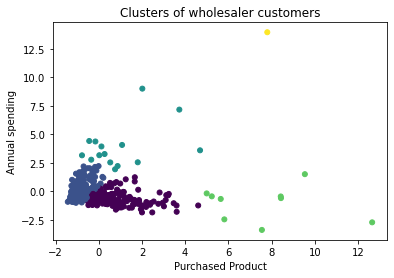

In [16]:
# Visualizing clusters

mtp.scatter(ps.iloc[:,0],ps.iloc[:,1],s=100, marker='.',c=y_pred)
mtp.title('Clusters of wholesaler customers')  
mtp.xlabel('Purchased Product')  
mtp.ylabel('Annual spending')    
mtp.show() 